# Assignment 4

## Report

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [27]:
 %tensorflow_version 2.x
 from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from matplotlib import pyplot

import numpy as np
import tensorflow as tf
import pandas as pd
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
 
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Reading the data and selecting the rows
data = pd.read_csv('17078.csv')
x =data.iloc[:,0:784].values
y= data.iloc[:,784].values
print(len(y))

#Spliting the data in training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 0,shuffle=True)




3000


Visulalizing the data

3


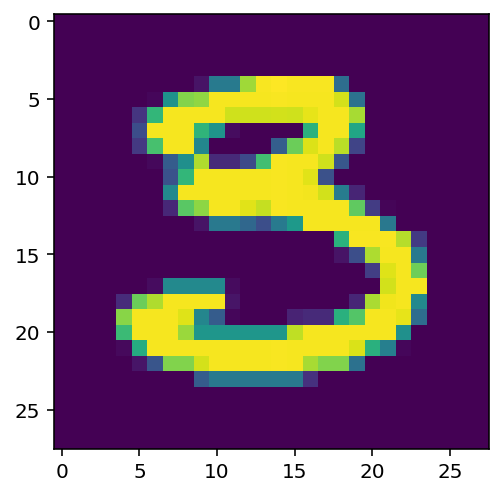

In [29]:

pixels = x_train[9].reshape(28,28)
plt.imshow(pixels)
print(y_train[9])

### Preprocessing the data

Scaling these values to a range of 0 to 1 before feeding them to the neural network model. To do so,  I divided the values by 255

In [30]:

x_train = x_train/255
x_test = x_test/255

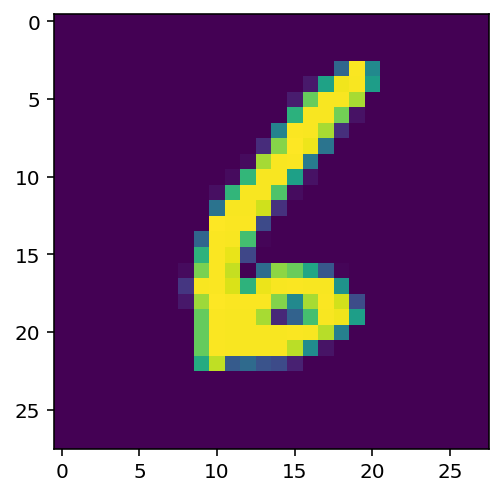

In [31]:
pixels = x_train[1].reshape(28,28)
plt.imshow(pixels)

##Building the model

I am bulding a fully connected neural network with input dimenssion 784 and output dimenssion is 10. In only has one hidden layer

The input and hidden layer has sigmoid activation function because the train data contain both positive and negative values.

The output layer has Softmax activation function.

In [33]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from torch import nn
bclfr = Sequential()

bclfr.add(Dense(units = 128 ,kernel_initializer ='uniform',activation = 'sigmoid', input_dim =784))
bclfr.add(Dense(units = 64 , kernel_initializer = 'uniform',activation ='sigmoid'))
bclfr.add(Dense(units = 10 ,kernel_initializer='uniform',activation='softmax'))

I am using stochastic gradient descent  for optimizing with leaning rate of 0.01 and sparse_categorical_crossentrop as a loss function

In [34]:
bclfr.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history =[]
history.append(bclfr.fit(x_train,y_train,batch_size=64,epochs = 10,validation_data=(x_test,y_test)));

Epoch 1/10
36/36 [==============================] - 0s 6ms/step - loss: 2.0368 - accuracy: 0.2364 - val_loss: 1.3175 - val_accuracy: 0.5947
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 0.8647 - accuracy: 0.7453 - val_loss: 0.6111 - val_accuracy: 0.8120
Epoch 3/10
36/36 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.8813 - val_loss: 0.3982 - val_accuracy: 0.8773
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 0.9284 - val_loss: 0.3858 - val_accuracy: 0.8827
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9551 - val_loss: 0.3916 - val_accuracy: 0.8707
Epoch 6/10
36/36 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9720 - val_loss: 0.3515 - val_accuracy: 0.8867
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 0.0772 - accuracy: 0.9813 - val_loss: 0.3068 - val_accuracy: 0.9027
Epoch 8/10
36/36 [==

In [35]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		pyplot.legend()
		# plot accuracy
		print('            ')
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.legend()
	
	pyplot.show()


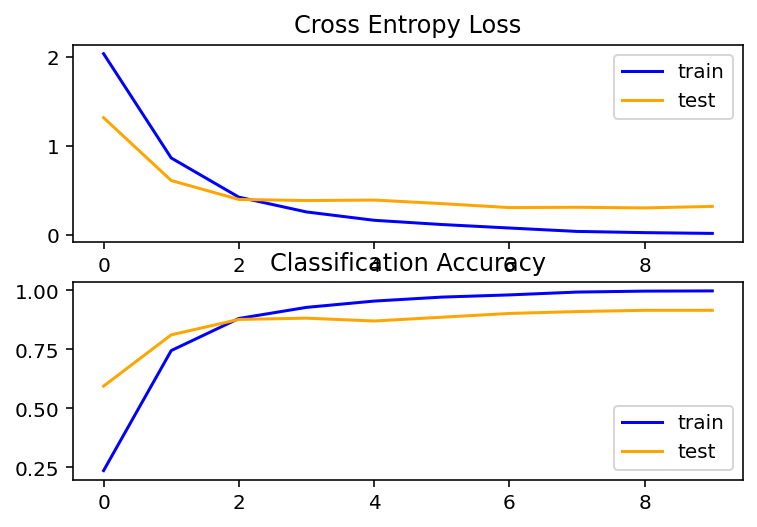

In [36]:
summarize_diagnostics(history)

## Observation
Form the above graph and above output of training we can see that at epoch 6  the validation accuracy is 91% which is highest of all , after epoch 6 the accuracy on the training set increases but the validation accuracy starts to decrease which is sign of **Overfitting**. 

At epoch 1 or 2 we can see that both of the training accuracy and validation accuracy is two low which shows underfitting.

Even from the graph, we can easily seee the underfitting of the model.



In [ ]:
test_loss,test_acc = bclfr.evaluate(x_test,y_test,verbose=2)

24/24 - 0s - loss: 0.3646 - accuracy: 0.9107


In [ ]:
probability_model = tf.keras.Sequential([bclfr])
predictions = probability_model.predict(x_test)

This function will plot a graph based on the results from the model trained above. It takes 
* i - position 
* prediction_array - The array of prediction predicted by my model.
* true_label - Actual label of test data set.

If the model predicted wrong result then the graph will be red, is the predicted result is right then the graph will be blue, if the model predicted some othe value but not confident about it the the graph is in the grey color.

In [ ]:

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

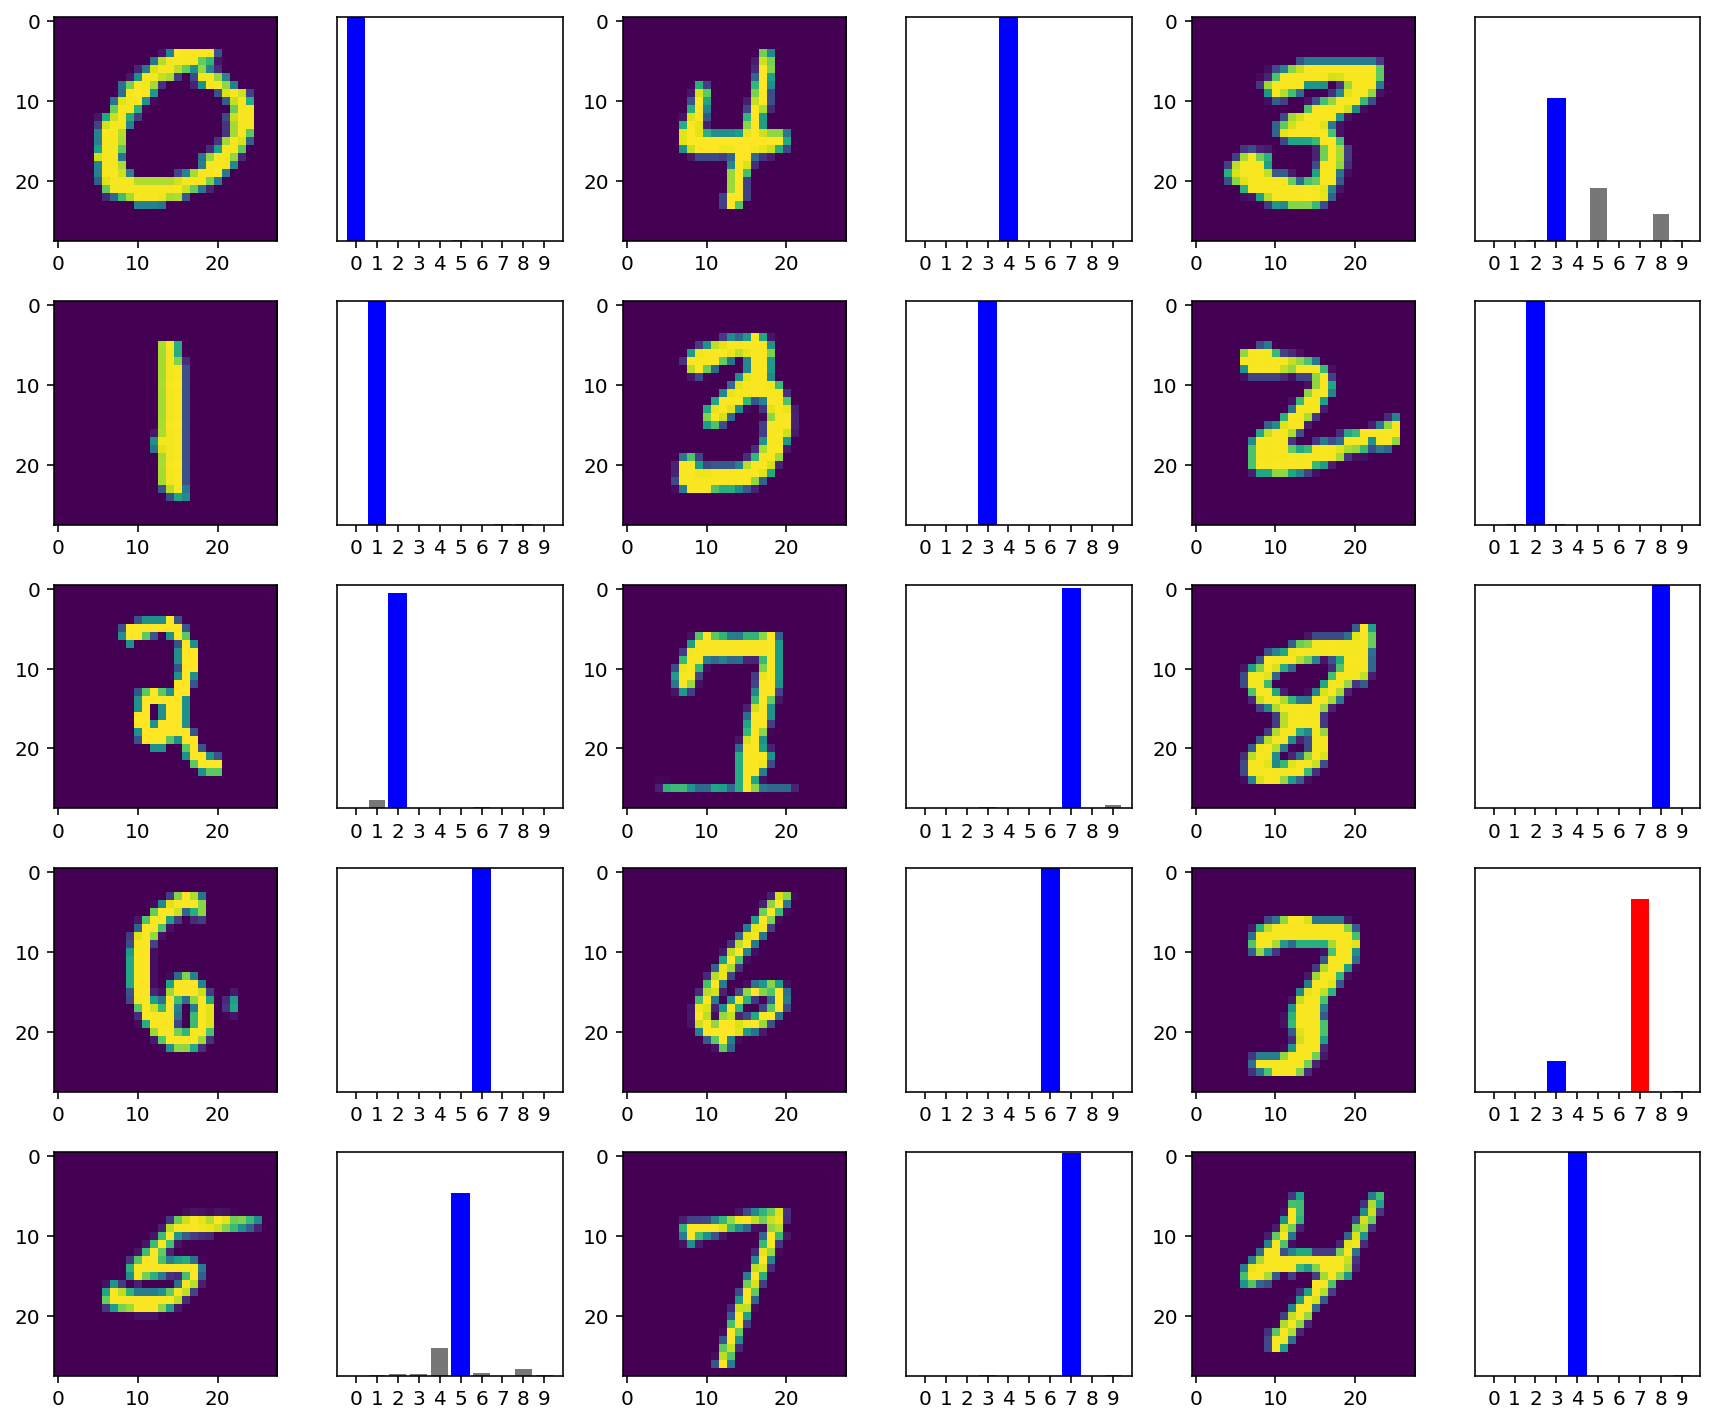

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.imshow(x_test[i].reshape(28,28))
  #plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

## Observation

As we can see that the 3 is missclassified as 7 this may be because due to less training data . moreover that 3 looks much like 7. 

All other test points are classified correctly


#Comparison with PCA features
With only single layer

In [37]:
#PCA

data = pd.read_csv('17078PCA.csv')
pca_x =data.iloc[:,0:25].values
pca_y= data.iloc[:,25].values
print(len(pca_y))

#Spliting the data in training and test data
from sklearn.model_selection import train_test_split
pca_x_train,pca_x_test,pca_y_train,pca_y_test = train_test_split(pca_x,pca_y, test_size = 0.25, random_state = 0,shuffle=True)



3000


For this model, I have kept 25% of train data for testing and I has only single layer with input dimenssion as 25 and output is 10. I have used softmax as activation function. 

In [38]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from torch import nn
pca = Sequential()

pca.add(Dense(units = 10 ,kernel_initializer ='uniform',activation = 'softmax', input_dim =25))


I am using stochastic gradient descent  for optimizing with leaning rate of 0.01 and sparse_categorical_crossentrop as a loss function

Epoch 1/20
36/36 [==============================] - 0s 5ms/step - loss: 1.0350 - accuracy: 0.7058 - val_loss: 0.5933 - val_accuracy: 0.8240
Epoch 2/20
36/36 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.8400 - val_loss: 0.5193 - val_accuracy: 0.8427
Epoch 3/20
36/36 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.8564 - val_loss: 0.4910 - val_accuracy: 0.8547
Epoch 4/20
36/36 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.8618 - val_loss: 0.4887 - val_accuracy: 0.8467
Epoch 5/20
36/36 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.8622 - val_loss: 0.4871 - val_accuracy: 0.8493
Epoch 6/20
36/36 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.8698 - val_loss: 0.4857 - val_accuracy: 0.8507
Epoch 7/20
36/36 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.8680 - val_loss: 0.4858 - val_accuracy: 0.8480
Epoch 8/20
36/36 [==

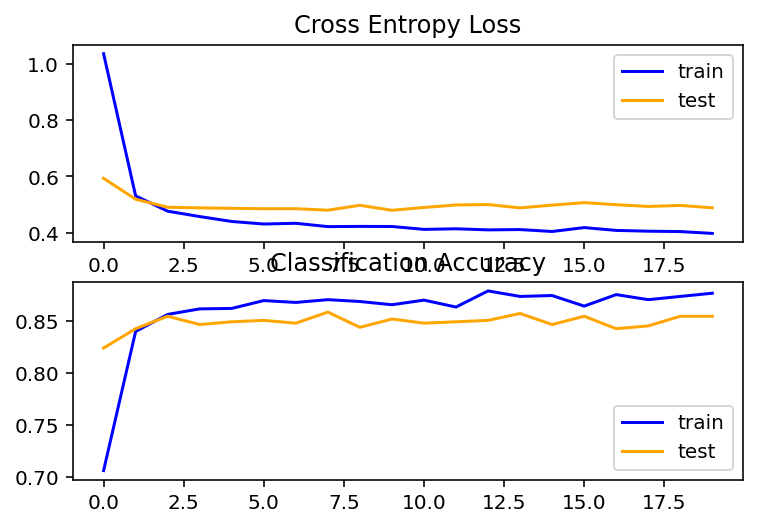

In [39]:
pca.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1 =[]
history1.append(pca.fit(pca_x_train,pca_y_train,batch_size=64,epochs = 20,validation_data=(pca_x_test,pca_y_test)))


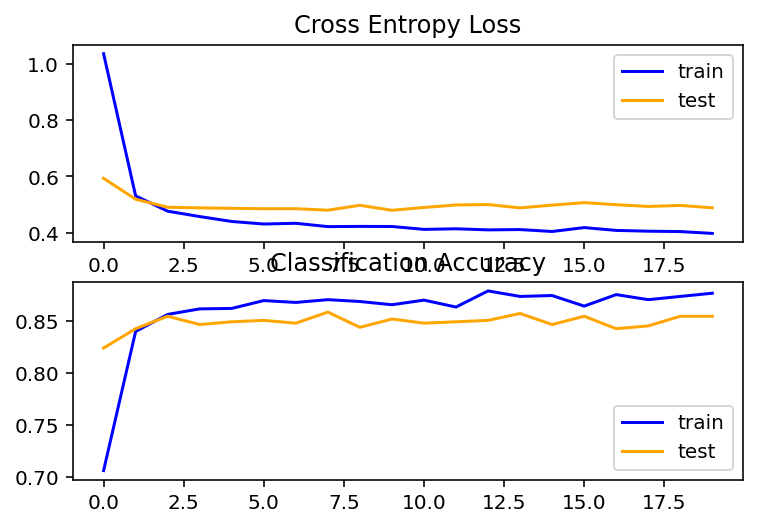

In [57]:
summarize_diagnostics(history1)

## Observation
 With only one layer the accuracy, and 100 epoch, the training accuracy converges to ~ 88% even the validation accuracy is around 83% which is much less than the SVM model that I have done in previous assignmnet. It had a test accuracy of 96% . Now lets try adding more layers
Here I have made a fully connected network.
The input and hidden layer has **sigmoid** activation function, whereas the output layer has **softmax** activation function.

In [72]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from torch import nn
pca_with_hidden_layer = Sequential()

pca_with_hidden_layer.add(Dense(units = 20 ,kernel_initializer ='uniform',activation = 'sigmoid', input_dim =25))
pca_with_hidden_layer.add(Dense(units=15,kernel_initializer='uniform',activation='sigmoid'))
pca_with_hidden_layer.add(Dense(units=10,kernel_initializer='uniform',activation='softmax'))



I am using stochastic gradient descent  for optimizing with leaning rate of 0.01 and sparse_categorical_crossentrop as a loss function

In [73]:
pca_with_hidden_layer.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2=[]
a=history2.append(pca_with_hidden_layer.fit(pca_x_train,pca_y_train,batch_size=64,epochs = 20,validation_data=(pca_x_test,pca_y_test)))


Epoch 1/20
36/36 [==============================] - 0s 5ms/step - loss: 2.0839 - accuracy: 0.1916 - val_loss: 1.8033 - val_accuracy: 0.2600
Epoch 2/20
36/36 [==============================] - 0s 4ms/step - loss: 1.5856 - accuracy: 0.3907 - val_loss: 1.2557 - val_accuracy: 0.5293
Epoch 3/20
36/36 [==============================] - 0s 4ms/step - loss: 1.0475 - accuracy: 0.6329 - val_loss: 0.9052 - val_accuracy: 0.6973
Epoch 4/20
36/36 [==============================] - 0s 4ms/step - loss: 0.7587 - accuracy: 0.7480 - val_loss: 0.7637 - val_accuracy: 0.7480
Epoch 5/20
36/36 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.8031 - val_loss: 0.7239 - val_accuracy: 0.7640
Epoch 6/20
36/36 [==============================] - 0s 3ms/step - loss: 0.5501 - accuracy: 0.8347 - val_loss: 0.6656 - val_accuracy: 0.7973
Epoch 7/20
36/36 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.8262 - val_loss: 0.6900 - val_accuracy: 0.7773
Epoch 8/20
36/36 [==

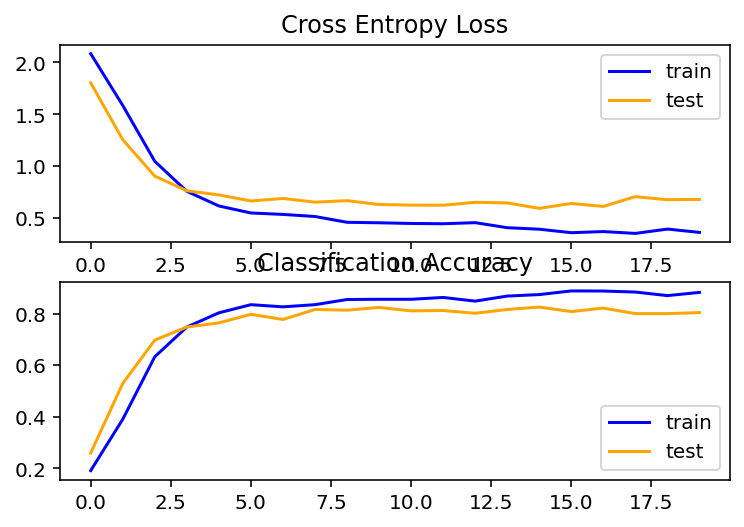

In [74]:
summarize_diagnostics(history2)

# Observation

After 20 epoch  accuracy has increased as I have increased the depth of of the nural network. It is because by adding the hidden layer I gave the network flexibility to fit to the data but also incresed the complexity of the basis function.

In [49]:
test_loss,test_acc = pca_with_hidden_layer.evaluate(pca_x_test,pca_y_test,verbose=2)
probability_model = tf.keras.Sequential([pca_with_hidden_layer])
predictions = probability_model.predict(pca_x_test)

24/24 - 0s - loss: 0.6953 - accuracy: 0.8240


## Visulalization of the above model
Ploting the graph with true label, I havent shown the image based on the features given in the data set because they don't make sense to human.
It is something like this Therefore I have printed the true lable against the predicted value.


 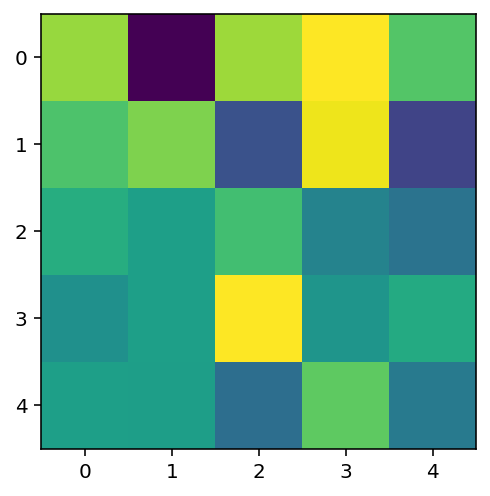



-------------------------------------------------------------------------------------------
Test(Actual) value = 0


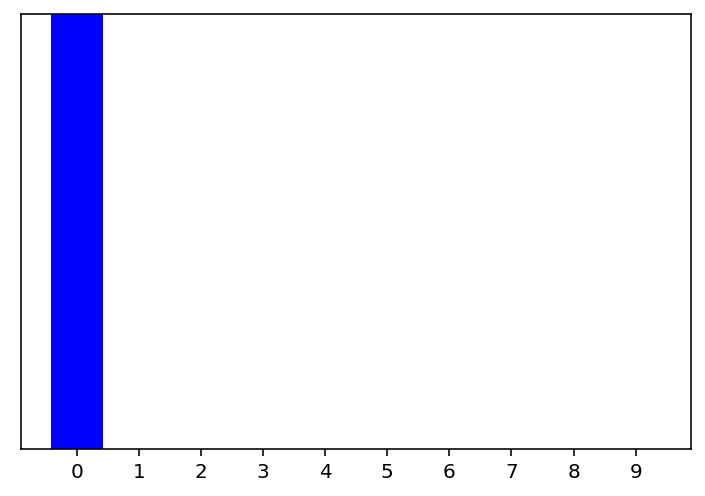

-------------------------------------------------------------------------------------------
Test(Actual) value = 4


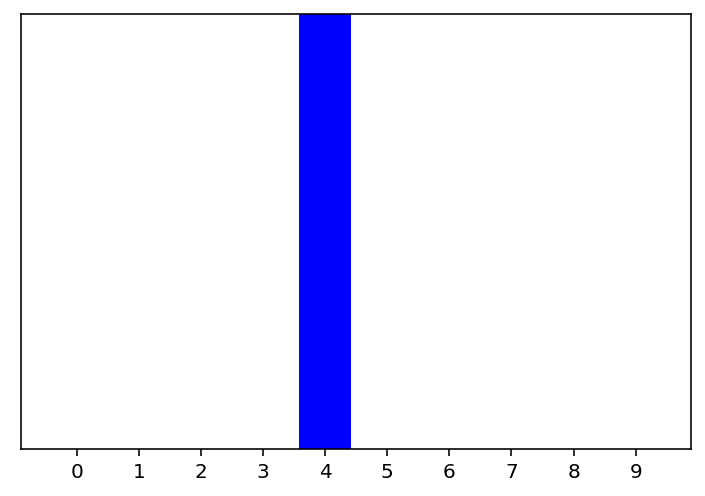

-------------------------------------------------------------------------------------------
Test(Actual) value = 3


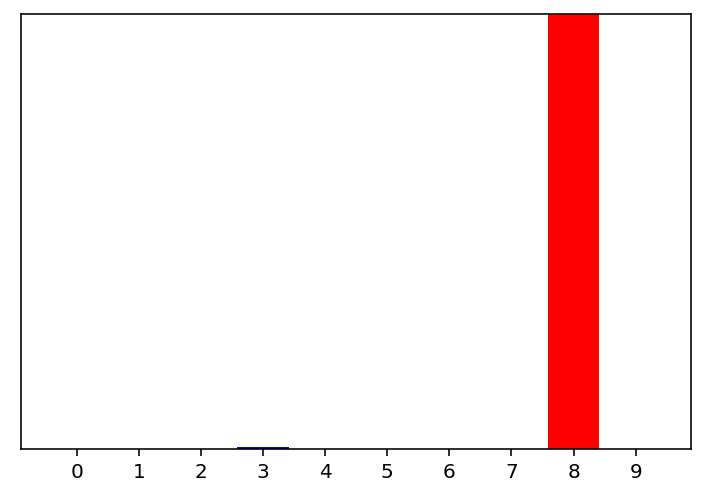

-------------------------------------------------------------------------------------------
Test(Actual) value = 1


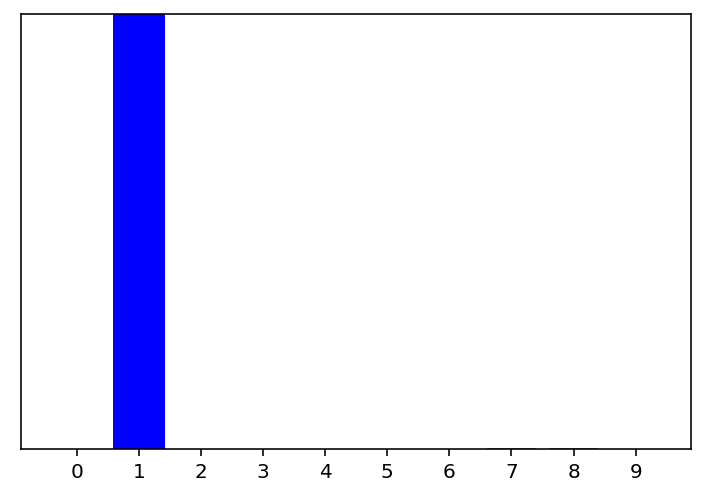

-------------------------------------------------------------------------------------------
Test(Actual) value = 3


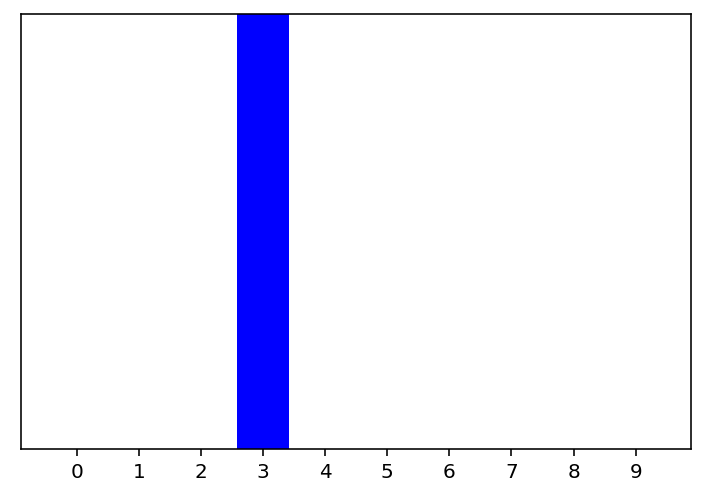

-------------------------------------------------------------------------------------------
Test(Actual) value = 2


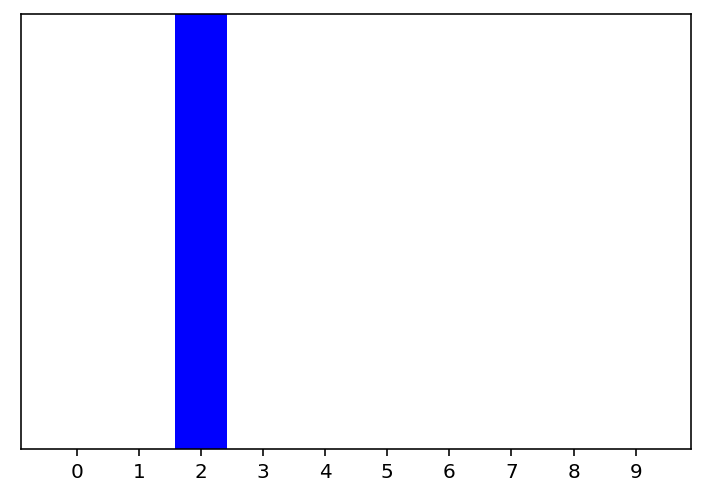

-------------------------------------------------------------------------------------------
Test(Actual) value = 2


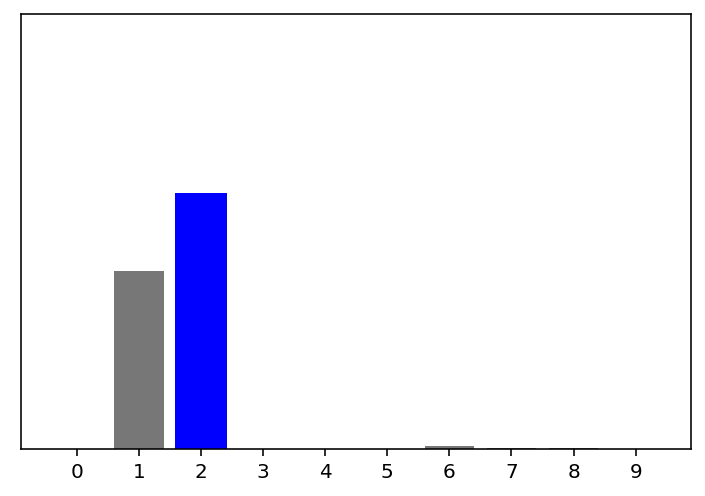

-------------------------------------------------------------------------------------------
Test(Actual) value = 7


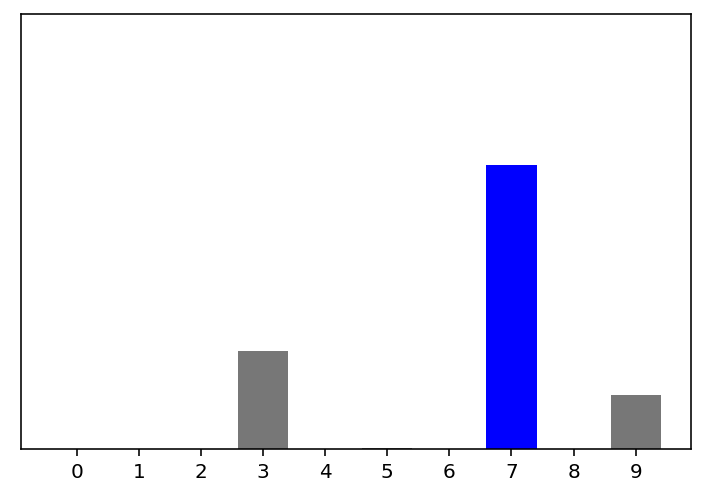

-------------------------------------------------------------------------------------------
Test(Actual) value = 8


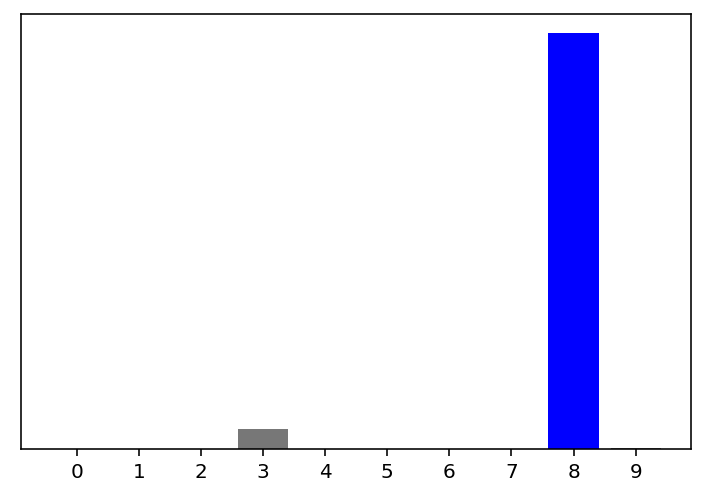

-------------------------------------------------------------------------------------------
Test(Actual) value = 6


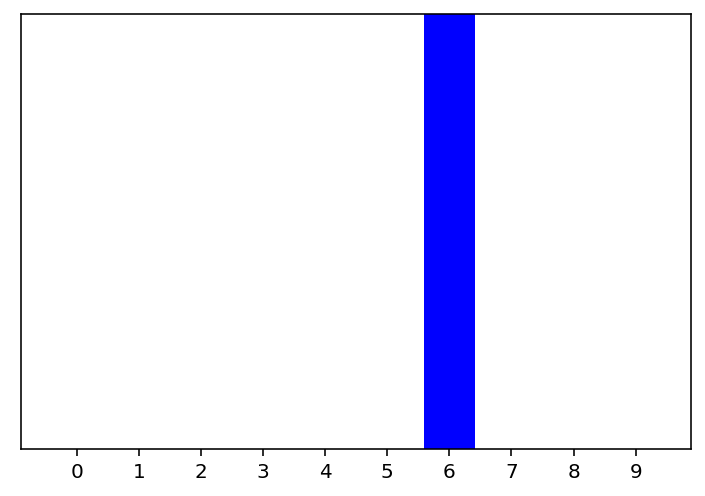

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.


for i in range(0,10):
 
  plot_value_array(i, predictions[i], pca_y_test)
  print('-------------------------------------------------------------------------------------------')
  print('Test(Actual) value =',pca_y_test[i])


  plt.show()



#CNN for MNIST Handwritten Digit Classification

As suggested, I am downloading the full mnist data from [here](http://yann.lecun.com/exdb/mnist/). I downloaded all data set then i decompresses them and then using idx2numpy library i converted them to the numpy array. 

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2020-06-28 14:05:05--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 104.28.7.204, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz.1’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB/s    in 0.01s   

2020-06-28 14:05:05 (2.04 MB/s) - ‘train-labels-idx1-ubyte.gz.1’ saved [28881/28881]

--2020-06-28 14:05:12--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.6.204, 104.28.7.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz.1’

train-images-idx3-u 100%[===================>]   9.45M  60.

In [52]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.2-cp36-none-any.whl size=8032 sha256=1c88c3da2cfdcea9771cf9ffbde746656ae2bdaebc3cfba1ed2f3b0885911984
  Stored in directory: /root/.cache/pip/wheels/7a/b5/69/3e0757b3086607e95db70661798fdf98a77a0bb79c54e1f320
Successfully built idx2numpy


### converting MNIST data to numpy arrary.

In [58]:
import idx2numpy
import numpy as np
train_images = idx2numpy.convert_from_file('/content/drive/My Drive/Assignment4/train-images-idx3-ubyte/train-images.idx3-ubyte')
test_images = idx2numpy.convert_from_file('/content/drive/My Drive/Assignment4/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte')
train_label = idx2numpy.convert_from_file('/content/drive/My Drive/Assignment4/train-labels-idx1-ubyte/train-labels.idx1-ubyte')
test_label = idx2numpy.convert_from_file('/content/drive/My Drive/Assignment4/t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


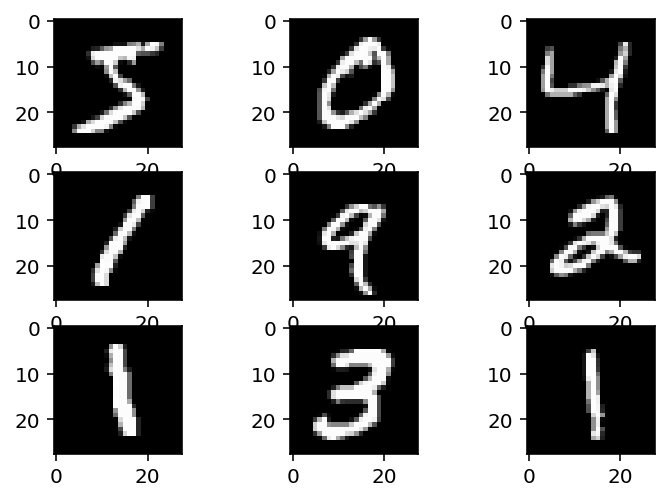

In [59]:
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset

# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_label.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_label.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

we know that the images are all pre-aligned (e.g. each image only contains a hand-drawn digit), that the images all have the same square size of 28×28 pixels, and that the images are grayscale.
load the images and reshape the data arrays to have a single color channel.

In [60]:
trainX = train_images.reshape((train_images.shape[0], 28, 28, 1))
testX = test_images.reshape((test_images.shape[0], 28, 28, 1))

Using a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes.

In [61]:
from keras.utils import to_categorical
trainY = to_categorical(train_label)
testY = to_categorical(test_label)

In [62]:
def load_dataset():

	# reshape dataset to have a single channel
	trainX = train_images.reshape((train_images.shape[0], 28, 28, 1))
	testX = test_images.reshape((test_images.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(train_label)
	testY = to_categorical(test_label)
	return trainX, trainY, testX, testY

###Rescaling image value from [0,255] to [0,1] 

In [63]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

### Defining Model

For convolution front-end , I will start with single Convolution layer with small filter size (3,3) and a modest number of filter (32 ) followed by a max polling layer. The filter maps can then be flattened to provide features to the classifier . I will be using Softmax activation function. in between the feature extrator and output layer I will adda  dense layer to interpret the features, 100 nodes

All layer will use reLU activation function and He weight initialization scheme.

I will use stochastic gradient decent optimizer with learning rate of 0.01 and momentum 0.9. The categorical cross-entropy loss function will be optimized, suitable for multi-class classification, and I will monitor the classification accuracy metric, which is appropriate given we have the same number of examples in each of the 10 classes.

In [64]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

The evaluate_model() function below implements these behaviors, taking the training dataset as arguments and returning a list of accuracy scores

In [65]:

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [66]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [67]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()


In [68]:

def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

> 98.442
> 98.667
> 98.608
> 98.850
> 98.742
            
            
            
            
            


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


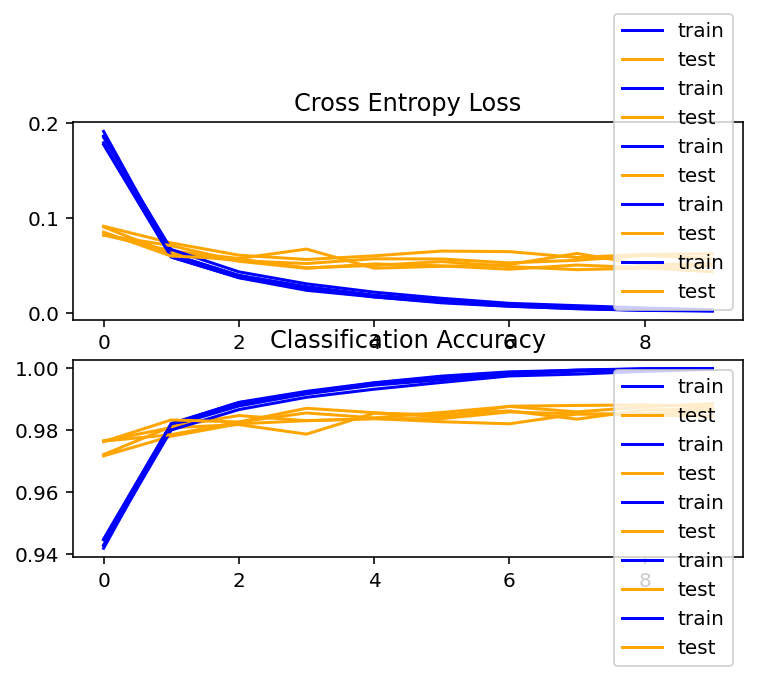

Accuracy: mean=98.662 std=0.136, n=5


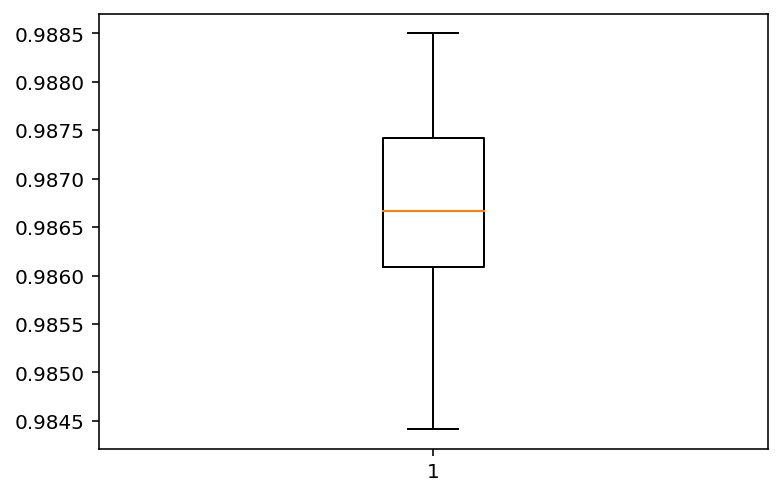

In [69]:
run_test_harness()

The model achieves a good fit, with train and test learning curves converging. There is no obvious sign of over- or underfitting. A box and whisker plot is created to summarize the distribution of accuracy scores.

Yes these are more natural or intuitive than the representations learnt by the standard neural net.

Batch normalization can be used after convolutional and fully connected layers. It has the effect of changing the distribution of the output of the layer, specifically by standardizing the outputs. This has the effect of stabilizing and accelerating the learning process.

As we increse the depth of the network the accuracy increases to 99%

